## 5-2. 교차 검증과 그리드 서치 
#### 학습 목표 
- 검증 세트가 필요한 이유를 이해하고 교차 검증에 대해 배운다. 
- 그리드 서치와 랜덤 서치를 이용하여 최적의 성능을 내는 하이퍼파라미터를 찾는다. 

#### 시작하기 전
- 지금까지 우리는 훈련 세트에서 모델을 훈련하고 테스트 세트에서 모델을 평가했다. 테스트 세트에서 얻은 점수를 보고 일반화 성능을 가늠화해 볼 수 있었다.
- 그런데 테스트 세트를 사용해 계속해서 성능을 확인하다 보면 점점 테스트 세트에 맞추는 불상사가 일어난다.
- 이전까지는 문제를 간단히 하려고 테스트 세트를 사용하였다. 하지만 테스트 세트로 일반화 성능을 올바르게 예측하려면 가능한 한 테스트 세트를 사용하지 말아야 한다. (모델을 만들고 나서 마지막에 딱 한 번만 사용하는 것이 좋다.)
- 결정 트리는 테스트해볼 매개변수가 많은데, 그렇다면 max_depth 매개변수를 사용한 하이퍼파라미터 튜닝을 어떻게 할 수 있을까?

## 1. 검증 세트 
- 테스트 세트를 사용하지 않으면 모델이 과대적합인지 과소적합인지 판단하기 어렵다. 
- 테스트 세트를 사용하지 않고, 이를 측정하는 간단한 방법은 훈련 세트를 또 나누는 것이다. 이 데이터를 **검증 세트(validation set)**라고 부른다.
- 해당 방식은 간단해보이지만 실제로 많이 사용하는 방법중 하나다. 앞에서 전체 데이터 중 20%를 테스트 세트로 만들고 나머지 80%를 훈련세트로 만들었다. 이 훈련 세트 중에서 다시 20%를 떼어 내어 검증 세트로 만든다. 

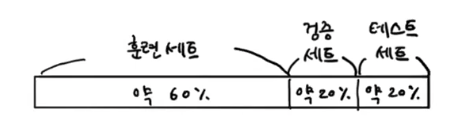

- 훈련 세트에서 모델을 훈련하고 검증 세트로 모델을 평가한다. 이런 식으로 테스트하고 싶은 매개변수를 바꿔가며 가장 좋은 모델을 고른다.
- 그런 다음, 이 매개변수를 사용해 훈련 세트와 검증 세트를 합쳐 전체 훈련 데이터에서 모델을 다시 훈련한다.
- 그리고 마지막에 테스트 세트에서 최종 점수를 평가한다.

In [1]:
# 예제 데이터 불러오기 - 와인 데이터
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')
wine

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0
...,...,...,...,...
6492,11.2,1.6,3.27,1.0
6493,9.6,8.0,3.15,1.0
6494,9.4,1.2,2.99,1.0
6495,12.8,1.1,3.34,1.0


In [2]:
# 클래스 열을 타깃으로 사용, 나머지 열은 feature 배열에 저장 
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [3]:
# feature 확인 
print(data)

[[ 9.4   1.9   3.51]
 [ 9.8   2.6   3.2 ]
 [ 9.8   2.3   3.26]
 ...
 [ 9.4   1.2   2.99]
 [12.8   1.1   3.34]
 [11.8   0.8   3.26]]


In [4]:
# target 확인 
print(target)

[0. 0. 0. ... 1. 1. 1.]


In [5]:
# 훈련 세트, 테스트 세트 나누기 
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42)

- 위 과정까지는 동일하다. 이제 부터 train_input, test_input을 다시 train_test_split 함수에 넣어 훈련세트(sub_input, sub_target)와 검증 세트(val_input, var_target)를 만든다.
- 여기서도 test_size 매개변수를 0.2로 지정하여 train_input의 약 20%를 val_input으로 만든다. 

In [6]:
# 훈련 세트, 검증 세트로 다시 나누기 
sub_input, val_input, sub_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

In [7]:
# 훈련 세트와 검증 세트 크기 확인 
print(sub_input.shape, val_input.shape)

(4157, 3) (1040, 3)


- 원래 5,197개였던 훈련 세트가 4,157개로 줄고, 검증 세트는 1,040개가 되었다. 
- 이제 sub_input, sub_target과 val_input, val_target을 사용해 모델을 만들고 평가 해보자

In [8]:
# 나눈 훈련 세트와 검증 세트로 모델 훈련 및 평가하기 
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(sub_input, sub_target)
print(dt.score(sub_input, sub_target))
print(dt.score(val_input, val_target))

0.9971133028626413
0.864423076923077


- 모델 평가 결과 훈련세트에 과대적합 되어 있는 것으로 나타났다. 이럴 경우 매개변수를 바꿔서 더 좋은 모델을 찾아야한다.
- 그전에 검증 세트에 관해 더 알아보고자 한다.

## 2. 교차 검증
- 검증 세트를 만드느라 훈련 세트가 줄었다. 보통 많은 데이터를 훈련에 사용할수록 좋은 모델이 만들어진다. 
- 그렇다고 검증 세트를 너무 조금 떼어 높으면 검증 점수가 들쭉날쭉하고 불안정 할 것이다. 이럴 때 **교차검증(cross validation)**을 이용하면 안정적인 검증 점수를 얻고 훈련에 더 많은 데이터를 사용할 수 있다. 
- 교차 검증은 검증 세트를 떼어 내어 평가하는 과정을 여러 번 반복한다. 
- 그다음 이 점수를 평균하여 최종 검증 점수를 얻는다. 
- 아래 그림은 3-폴드 교차 검증의 과정이다. 

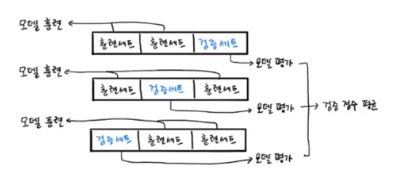

- 참고로 **3-폴드 교차 검증**은 훈련 세트를 세 부분으로 나눠서 교차 검증을 수행하는 것을 말한다. 통칭 **k-폴드 교차 검증(k-fold cross validation)**이라고 하며, 훈련 세트를 몇 부분으로 나누냐에 따라 다르게 부른다. 
- 이해를 돕기위해 3-폴드 교차 검증을 예시로 들었지만, 보통 5-폴드 교차 검증이나 10-폴드 교차 검증을 많이 사용한다. (이렇게 하면 데이터의 80%~90%까지 훈련에 사용할 수 있다.)
- 검증 세트가 줄어들지만 각 폴드에서 계산한 검증 점수를 평균하기 때문에 안정된 점수로 생각할 수 있다.
- 사이킷런에는 **cross_validate()**라는 교차 검증 함수가 있다. 
- 사용법은 먼저 평가할 모델 객체를 첫 번째 매개변수로 전달한다. 그다음 앞에서 처럼 직접 검증 세트를 뗴어 내지 않고 훈련 세트 전체를 cross_validat() 함수에 전달한다.

In [9]:
# 훈련 세트와 검증 세트를 이용하여 교차 검증 실시하기 
from sklearn.model_selection import cross_validate
scores = cross_validate(dt, train_input, train_target)
print(scores)

{'fit_time': array([0.00580883, 0.00576997, 0.00574493, 0.006742  , 0.00628304]), 'score_time': array([0.00058293, 0.00061893, 0.00058317, 0.00084805, 0.00071979]), 'test_score': array([0.86923077, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}


- 이 함수는 **'fit_time, score_time, test_score'** 키를 가진 딕셔너리를 반환 한다.
- 처음 2개의 키값은 각각 모델을 훈련하는 시간과 검증하는 시간을 의미한다.
- 각 키값마다 5개의 숫자가 담겨있다. cross_validate() 함수는 기본적으로 5-폴드 교차 검증을 수행한다. (cv 매개변수에서 폴드 수를 바꿀 수 있다.)
- 교차 검증의 최종 점수는 **test_score** 키에 담긴 5개의 점수를 평균하여 얻을 수 있다. 이름은 test_score지만 검증 폴드의 점수이다. 혼동하지 않게 주의 하자

In [10]:
# 교차 검증의 최종 점수 test_score 키에 담긴 5개의 평균 점수 출력 
import numpy as np
print(np.mean(scores['test_score']))

0.855300214703487


### 2-1.분할기를 사용한 교차 검증 

- 교차 검증을 수행하면 입력한 모델에서 얻을 수 있는 최상의 검증 점수를 가늠해 볼 수 있다.
- 한 가지 주의할 점은 cross_validate()는 훈련 세트를 섞어 폴드를 나누지 않는다. 앞서 우리는 train_test_split() 함수로 전체 데이터를 섞은 후 훈련 세트를 준비했기 때문에 따로 섞을 필요가 없지만, 만약 교차 검증을 할 때 훈련 세트를 섞으려면 **분할기(splitter)**를 지정해야한다.
- 사이킷런의 분할기는 교차 검증에서 폴드를 어떻게 나눌지 결정해 준다. cross_validate() 함수는 기본적으로 **회귀 모델일 경우 KFold 분할기를 사용**하고 **분류 모델일 경우 타깃 클래스를 골고루 나누기 위해 StratifiedKFold를 사용**한다. 

In [11]:
# 해당 모델은 분류 모델이므로 분할기 교차 검증시 StratifiedKFold를 사용한다. 
from sklearn.model_selection import StratifiedKFold
scores = cross_validate(dt, train_input, train_target, cv=StratifiedKFold())
print(np.mean(scores['test_score']))

0.855300214703487


In [12]:
# 만약 0-폴드 교차 검증을 수행하려면 - 'n_splits=10'으로 설정, 그런 다음 훈련 세트를 분할기를 사용하여 섞음
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_validate(dt, train_input, train_target, cv=splitter)
print(np.mean(scores['test_score']))

0.8574181117533719


- 여기까지 KFold 클래스도 동일한 방식으로 사용할 수 있다. 
- 이어서 결정 트리의 매개변수 값을 바꾸가며 가장 좋은 성능이 나오는 모델을 찾아보겠다.
- 이때 테스트 세트를 사용하지 않고, 교차 검증을 통해 좋은 모델을 고르면 된다.

## 3. 하이퍼파라미터 튜닝 
- 머신러닝 모델이 학습하는 파라미터를 모델 파라미터라고 한다. 반면 모델이 학습할 수 없어서 사용자가 지정해야만 하는 파라미터를 **하이퍼파라미터**라고 한다.
- 사이킷런과 같은 머신러닝 라이브러리를 사용할 때 이런 하이퍼파라미터는 모두 클래스나 매서드의 매개변수로 표현된다.
- 이런 하이퍼파라미터를 튜닝하는 작업은 어떻게 진행할까? 

### 3-1. 그리드 서치
- 우선 라이브러리가 제공하는 기본값을 그대로 사용해 모델을 훈련한다.
- 그다음 검증 세트의 점수나 교차 검증을 통해서 매개변수를 조금씩 바꿔본다. 모델마다 적게는 1-2개에서 많게는 5-6개의 매개변수를 제공한다. 이 매개변수를 바꿔가면서 모델을 훈련하고 교차 검증을 수행한다.
- 그런데 중요한 점은, 가령 결정 트리 모델에서 최적의 max_depth 값을 찾았다고 가정했을 때, **그다음 max_depth를 최적의 값으로 고정**하고 **min_samples_split을 바꿔가면서 최적의 값을 찾는다** 라고 하자. 이렇게 한 매개변수의 최적값을 찾고 다른 매개변수의 최적값을 찾아도 될까?
- 안타깝게도 아니다. **max_depth**의 최적값은 **min_samples_split** 매개변수의 값이 바뀌면 함께 달라진다. 즉 두 매개변수를 동시에 바꿔가며 최적의 값을 찾아야 한다.
- 게다가 매개변수가 많아지면 문제는 더 복잡해진다. 파이썬의 for 반복문을 이런 과정을 직접 구현할 수도 있지만, 사이킷 런에서 제공하는 **그리드 서치(Grid Search)**를 사용하면 매우 편리하다.
- 사이킷런의 **GridSearchCV** 클래스는 친절하게도 하이퍼파라미터 탐색과 교차 검증을 한 번에 수행한다. 별도로 cross_validate() 함수를 호출할 필요가 없다.

In [13]:
# 기본 매개변수를 사용한 결정 트리 모델에서 min_impurity_decrease 매개변수의 최적값 찾기
from sklearn.model_selection import GridSearchCV
params = {'min_impurity_decrease': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005]} # 정보 이득의 최솟값 (5-1 연습문제 3 참조)
params

{'min_impurity_decrease': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005]}

- 여기서는 0.0001 부터 0.0005 까지 0.0001씩 증가하는 5개의 값을 시도하겠다. 

In [15]:
# GridSearchCV 클래스에 탐색 대상 모델과 params 변수를 전달하여 그리드 서치 객체 만들기 
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)
gs

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'min_impurity_decrease': [0.0001, 0.0002, 0.0003,
                                                   0.0004, 0.0005]})

- 결정 트리 클래스의 객체를 생성하자마자 바로 전달하였다. 
- 그다음 일반 모델을 훈련하는 것처럼 gs 객체에 fit() 메서드를 호출한다.
- 이 매서드를 호출하면 그리드 서치 객체는 결정 트리 모델 min_impurity_decrease 값을 바꿔가며 총 5번을 실행한다.
- GridSearchCV의 cv 매개변수 기본값은 5이다. 따라서 min_impurity_decrease 값마다 5-폴드 교차 검증을 수행한다. 결국 5 X 5 = 25개의 모델을 훈련한다.
- 많은 모델을 훈련하기 때문에 GridSearchCV 클래스의 n_jobs 매개변수에서 병령 실행에 사용할 CPU 코어 수를 지정하는 것이 좋다. 이 매개변수의 기본값은 1이다. -1로 지정하면 시스템에 있는 모든 코어를 사용한다. 

In [16]:
# 그리드 서치 수행 
gs.fit(train_input, train_target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'min_impurity_decrease': [0.0001, 0.0002, 0.0003,
                                                   0.0004, 0.0005]})

- 교차 검증에서 최적의 하이퍼파라미터를 찾으면 전체 훈련 세트로 모델을 다시 만들어야 한다고 했다. 아주 편리하게도 사이킷런의 그리드 서치는 훈련이 끝나면 25개의 모델 중에서 검증 점수가 가장 높은 모델의 매개변수 조합으로 전체 훈련 세트에서 자동으로 다시 모델을 훈련한다. 
- 이 모델은 gs 객체의 best_estimator_ 속성에 저장되어 있다. (일반 결정 트리처럼 똑같이 사용 가능)

In [17]:
# 최적의 하이퍼파라미터로 모델을 다시 훈련 후 결과 
dt = gs.best_estimator_
print(dt.score(train_input, train_target))

0.9615162593804117


- 그리드 서치로 찾은 최적의 매개변수는 best_params_ 속성에 저정 되어 있다.

In [18]:
# 최상의 매개변수 조합 확인 
print(gs.best_params_)

{'min_impurity_decrease': 0.0001}


- 여기서는 0.0001이 가장 좋은 값으로 선택되었다.
- 각 매개변수에서 수행한 교차 검증의 평균 점수는 cv_results_ 속성의 'mean_test_score' 키에 저장되어 있다. 

In [19]:
# 5번의 교차 검증으로 얻은 점수 출력 
print(gs.cv_results_['mean_test_score'])

[0.86819297 0.86453617 0.86492226 0.86780891 0.86761605]


- 점수 결과 첫 번째 값이 가장 크다. 
- 수동으로 고르는 것 보다 넘파이 argmax() 함수를 사용하면 가장 큰 값의 인덱스를 추출할 수 있다. 그다음 이 인덱스를 사용해 params 키에 젖아된 매개변수를 출력할 수 있다. 
- 이 값이 최상의 검증 점수를 만든 매개변수 조합이다. 앞에서 출력한 gs.best_params_와 동일한지 확인해보자.

In [21]:
# gs.best_params와 동일한지 확인 
best_index = np.argmax(gs.cv_results_['mean_test_score'])
print(gs.cv_results_['params'][best_index])

{'min_impurity_decrease': 0.0001}


- 과정을 정리하자면 다음과 같다 
    1. 먼저 탐색할 매개변수를 지정한다.
    2. 그다음 훈련 세트에서 그리드 서치를 수행하여 최상의 평균 검증 점수가 나오는 매개변수 조합을 찾는다. 이 조합은 그리드 서치 객체에 저장된다.
    3. 그리드 서치는 최상의 매개변수에서 (교차 검증에 사용한 훈련 세트가 아니라) 전체 훈련 세트를 사용해 최종 모델을 훈련한다. 이 모델도 그리드 서치 객체에 저장된다.

- 그럼 조금 더 복잡한 매개변수 조합을 탐색해보자, 결정 트리에서 min_impurity_decrease는 노드를 분할하기 위한 불순도 감소 최소량을 지정한다. 
- 여기에다가 max_depth로 트리의 깊이를 제한하고 min_samples_split으로 노드를 나누기 위한 최소 샘플 수도 골라 보자 

In [22]:
params = {'min_impurity_decrease': np.arange(0.0001, 0.001, 0.0001),
         'max_depth': range(5, 20, 1),
         'min_samples_split': range(2, 100, 10)
         }

- 넘파이 arange() 함수는 첫 번째 매개변수 값에서 시작하여 두 번째 매개변수에 도달할 때까지 세 번째 매개변수를 계속 더한 배열을 만든다. 코드에서는 0.0001에서 시작하여 0.001이 될 때까지 0.0001을 계속 더한 배열이다. 두 번째 매개변수는 포함되지 않으므로 배열의 원소는 총 9개 이다.
- 파이썬 range() 함수도 비슷하다. 하지만 이 함수는 정수만 사용할 수 있다. 이 경우 max_depth를 5에서 20까지 1씩 증가하면서 15개의 값을 만든다. 
- min_samples_split은 2에서 100까지 10씩 증가하면서 10개의 값을 만든다. 

- 따라서 이 매개변수로 수행할 교체 검증 횟수는 9 X 15 X 10 = 1,350개 이다. 기본 5-폴드 교차 검증을 수행하므로 만들어지는 모델의 수는 6,750개나 된다. 

In [23]:
# n_jobs = -1 (CPU 모든 코어 사용)로 설정하고 그리드 서치 실행 
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)
gs.fit(train_input, train_target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(5, 20),
                         'min_impurity_decrease': array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009]),
                         'min_samples_split': range(2, 100, 10)})

In [24]:
# 최상의 매개변수 조합 확인 
print(gs.best_params_)

{'max_depth': 14, 'min_impurity_decrease': 0.0004, 'min_samples_split': 12}


In [25]:
# 최상의 교차 검증 점수 확인 
print(np.max(gs.cv_results_['mean_test_score']))

0.8683865773302731


- GridSearchCV 클래스를 사용하니 매개변수를 일일이 바꿔가며 교차 검증을 수행하지 않고 원하는 매개변수 값을 나열하면 자동으로 교차 검증을 수행해서 최상의 매개변수를 찾을 수 있다.
- 그런 조금 아쉬운 점은, 앞에서 탐색할 매개변수의 간격을 0.0001 혹은 1로 설정했는데, 이렇게 간격을 설정한 특별한 근거가 없다.

### 3-2. 랜덤 서치 
- 매개변수의 값이 수치일 때 값의 범위나 간격을 미리 정하기 어려울 수 있다. 또 너무 많은 매개 변수 조건이 있어 그리드 서치 수행 시간이 오래 걸릴수 있다. 이럴 때 **랜덤 서치(Random Search)**를 사용하면 좋다. 
- 랜덤 서치에는 매개변수 값의 목록을 전달하는 것이 아니라 매개변수를 샘플링할 수 있는 확률 분포 객체를 전달한다.

In [26]:
# 싸이파이에서 2개의 확률 분포 클래스 임포트 
from scipy.stats import uniform, randint

- 싸이파이의 stats 서브 패키지에 있는 uniform과 randint 클래스는 모두 주어진 범위에서 고르게 값을 뽑는다. 이를 **'균등 분포에서 샘플링한다.'** 라고 말한다.
- randint는 정수값을 뽑고, uniform은 실수값을 뽑는다. 
- 사용하는 방법은 동일하다. 

In [27]:
# 0에서 10 사이의 범위를 갖는 randint 객체를 만들고 10개의 숫자를 샘플링
rgen = randint(0, 10)
rgen.rvs(10)

array([2, 2, 5, 9, 5, 8, 0, 7, 2, 8])

- 10개 밖에 되지 않기 때문에 고르게 샘플링되는 것 같지 않지만 샘플링 숫자를 늘리면 쉽게 확인 가능하다.

In [28]:
# 1,000개를 샘플링
np.unique(rgen.rvs(1000), return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([ 87, 101, 114,  96,  92, 113, 109, 102,  94,  92]))

- 개수가 늘어나니 0에서 9까지의 숫자가 어느 정도 고르게 추출된 것을 볼 수 있다. 
- uniform 사용도 동일하다.

In [29]:
# uniform을 이용하여 샘플링 추출 
ugen = uniform(0, 1)
ugen.rvs(10)

array([0.41009101, 0.86176153, 0.65923789, 0.28692128, 0.12766023,
       0.88015643, 0.6419445 , 0.69897365, 0.16730048, 0.35289234])

- 위의 숫자들은 난수 발생기랑 유사하게 생각하면 된다. 랜덤 서치에서 randint와 uniform 클래스 객체를 넘겨주고 총 몇 번을 샘플링해서 최적의 매개변수를 찾으라고 명령할 수 있다. 샘플링 횟수는 시스템 자원이 허락하는 범위 내에서 최대한 크게 하는 것이 좋다. 
- 그럼 탐색할 매개변수의 딕셔너리를 만들어 보자 
- 여기에서는 min_samples_leaf 매개변수를 탐색 대상에서 추가한다. 이 매개변수는 리프 노드가 되기 위한 최소 샘플의 개수 이다.
- 어떤 노드가 분할하여 만들어질 자식 노드의 샘플 수가 이 값보다 작을 경우 분할하지 않는다.

In [30]:
# 탐색할 매개변수 범위 설정 
params = {'min_impurity_decrease': uniform(0.0001, 0.001),
         'max_depth': range(20, 50),
         'min_samples_split': randint(2, 25),
         'min_samples_leaf': randint(1, 25)
         }

- min_imputiry_decrease는 0.0001 에서 0.001 사이의 실숫값을 샘플링 한다. 
- max_depth는 20에서 50 사이의 정수, min_samples_split은 2에서 25 사이의 정수, min_samples_leaf는 1에서 25 사이의 정수를 샘플링한다.
- 샘플링 횟수는 사이킷런의 랜덤 서치 클래스인 **RandomizedSearchCV의 n_liter 매개 변수에 지정**한다.

In [31]:
# 샘플링 횟수 RandomizedSearchCV를 이용하여 매개변수 지정 
from sklearn.model_selection import RandomizedSearchCV
gs = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), params,
                       n_iter=100, n_jobs=-1, random_state=42)
gs.fit(train_input, train_target)

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': range(20, 50),
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fae3ccd4520>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fae374174c0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fae393881f0>},
                   random_state=42)

- 위 params에 정의된 매개변수 범위에서 총 100번(n_iter 매개변수)을 샘플링하여 교차 검증을 수행하고 최적의 매개변수 조합을 찾는다.
- 앞서 그리드 서치보다 훨씬 교차 검증 수를 줄이면서 넓은 영역을 효과적으로 탐색할 수 있다. 

In [32]:
# 최적의 매개변수 조합 출력 
print(gs.best_params_)

{'max_depth': 39, 'min_impurity_decrease': 0.00034102546602601173, 'min_samples_leaf': 7, 'min_samples_split': 13}


In [35]:
# 최고의 교차 검증 점수 확인 
print(np.max(gs.cv_results_['mean_test_score']))

0.8695428296438884


- 최적의 모델은 이미 전체 훈련 세트 (train_input, train_target)로 훈련되어 best_estimator_ 속성에 저장되어 있다. 

In [36]:
# 모델을 최종 결정하고 테스트 세트의 성능 확인 
dt = gs.best_estimator_
print(dt.score(test_input, test_target))

0.86


- 테스트 세트 점수는 검증 세트에 대한 점수보다 조금 작은 것이 일반적이다.
- 테스트 세트 점수가 아주 만족스럽지는 않지만 충분히 다양한 매개변수를 테스트해서 얻은 결과임은 확실 하다.
- 앞으로 수동으로 매개변수를 바꾸는 대신 그리드 서치나 랜덤 서치를 사용하는 것이 합리적으로 보여진다. 

## 문제해결 과정 및 결론 
- 해결 과정 
    - 레드 와인과 화이트 와인을 선별하는 작업의 성능을 끌어올리기 위해 결정 트리의 다양한 하이퍼파라미터를 시도해 봐야 한다. 이런 과정에서 테스트 세트를 사용하면 결국 테스트 세트에 맞춰 모델을 훈련하는 효과를 만들어 낸다.
    - 테스트 세트는 최종 모델을 선택할 때까지 사용하지 않아야 한다. 테스트 세트를 사용하지 않고 모델을 평가하려면 또 다른 세트가 필요하다. 이를 검증 세트라고 부른다. 
    - 검증 세트는 훈련 세트 중 일부를 다시 덜어 내어 만든다. 
    - 검증 세트가 크지 않다면 어떻게 데이터를 나누었는지에 따라 검증 점수가 들쭉날쭉할 것이다. 훈련한 모델의 선응을 안정적으로 평가하기 위해 검증 세트를 한 번 나누어 모델을 평가하는 것에 그치지 않고, 여러 번 반복할 수 있는데, 이를 교차 검증이라고 한다. 
    - 보통 훈련 세트를 5등분 혹은 10등분 한다. 나누어진 한 덩어리를 폴드라고 부르며 한 폴드씩 돌아가면서 검증 세트의 역할을 한다. 따라서 전체적으로 5개 혹은 10개의 모델을 만든다.
    - 교차 검증을 사용한 다양한 하이퍼파라미터를 탐색한다. 머신러닝 라이브러리에서는 클래스와 메서드의 매개변수를 바꾸어 모델을 훈련하고 평가해 보는 작업이다.
    - 이런 과정은 때론 지루하고 반복적이다. 테스트하고 싶은 매개변수 리스트를 만들어 이 과정을 자동화하는 그리드 서치를 사용하면 편리하다.
    - 매개변수 값이 수치형이고 특히 연속적인 실수값이라면 싸이파이의 확률 분포 객체를 전달하여 특성 범위 내에서 지정된 횟수만큼 매개변수 후보 값을 샘플링하여 교차 검증을 시도할 수 있다. 
    - 이는 한정된 자원을 최대한 활용하여 효율적으로 하이퍼파라미터 공간을 탐샐할 수 있는 아주 좋은 도구이다.

In [37]:
# 확인문제 3번 정답 확인 코드
from sklearn.model_selection import RandomizedSearchCV
gs = RandomizedSearchCV(DecisionTreeClassifier(random_state=42, splitter='random'), params,
                       n_iter=100, n_jobs=-1, random_state=42)
gs.fit(train_input, train_target)

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42,
                                                    splitter='random'),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': range(20, 50),
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fae3ccd4520>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fae374174c0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fae393881f0>},
                   random_state=42)

In [38]:
# 최적의 매개변수 조합 출력 
print(gs.best_params_)

{'max_depth': 43, 'min_impurity_decrease': 0.00011407982271508446, 'min_samples_leaf': 19, 'min_samples_split': 18}


In [39]:
# 최고의 교차 검증 점수 확인 
print(np.max(gs.cv_results_['mean_test_score']))

0.8458726956392981


In [40]:
# 모델을 최종 결정하고 테스트 세트의 성능 확인 
dt = gs.best_estimator_
print(dt.score(test_input, test_target))

0.786923076923077


- DecisionTreeClassifier 클래스에 splitter='random' 매개변수를 추가하고 다시 훈련한 결과 테스트 세트 성능이 낮아졌다. 
- splitter 매개변수의 기본 값은 'best'로 각 노드에서 최선의 분할을 찾는다. 
- 'random'이면 무작위로 분할한 다음 가장 좋은 것을 고른다. 왜 이런 옵션이 필요한지 다음 절에서 알 수 있다.